In [1]:
import pandas as pd

In [196]:
data=pd.read_csv("dataset2024.csv",delimiter=";")

In [197]:
data.groupby("estado").aggregate('mean').T

estado,0,1
exitosos,9.546875,5.729670
fallidos,11.934896,10.740659
envios,21.481771,16.490110
e0,0.679688,0.358242
e1,0.013021,0.006593
e2,0.000000,0.000000
e3,0.515625,0.215385
e4,0.861979,0.626374
e5,0.000000,0.000000
e6,0.010417,0.013187


In [155]:
target=["estado"]
predictors=["exitosos","fallidos","envios"]
for i in range(0,53):
    predictors.append("e"+str(i))
data=data[target+predictors]

In [156]:
data

,estado,exitosos,fallidos,envios,e0,e1,e2,e3,e4,e5,...,e43,e44,e45,e46,e47,e48,e49,e50,e51,e52
0,1,10,21,31,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,7,9,16,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,6,10,16,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,0,11,5,16,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
835,0,9,7,16,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
836,0,11,20,31,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
837,0,16,15,31,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='estado'>

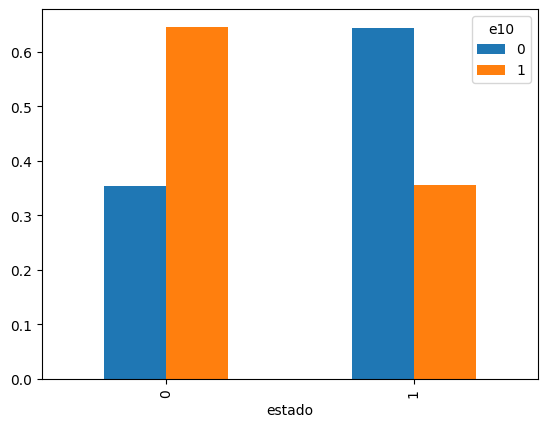

In [157]:
pd.crosstab(data["estado"],data["e10"],normalize="index").plot.bar()

<Axes: xlabel='estado'>

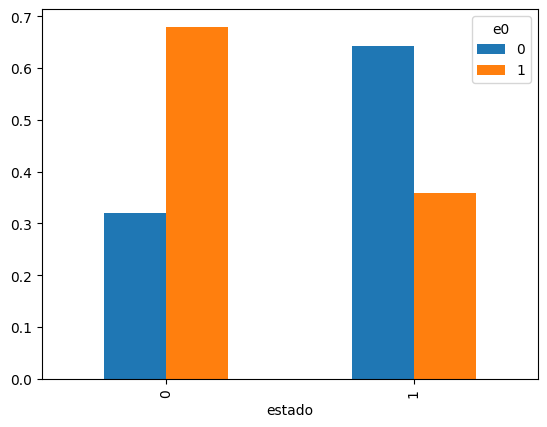

In [158]:
pd.crosstab(data["estado"],data["e0"],normalize="index").plot.bar()

In [167]:
from sklearn.model_selection import train_test_split
import numpy as np

In [168]:
Y=data["estado"].astype("category").cat.codes

In [169]:
Y.value_counts()

1    455
0    384
Name: count, dtype: int64

In [170]:
X=data[predictors]

In [171]:
X

,exitosos,fallidos,envios,e0,e1,e2,e3,e4,e5,e6,...,e43,e44,e45,e46,e47,e48,e49,e50,e51,e52
0,10,21,31,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,9,16,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,10,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,11,5,16,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
835,9,7,16,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
836,11,20,31,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
837,16,15,31,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
X=X.to_numpy()
Y=Y.to_numpy()

In [173]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1)

In [174]:
from imblearn.over_sampling import RandomOverSampler

In [175]:
np.sum(y_train)

364

In [176]:
y_train.shape

(671,)

In [177]:
os=RandomOverSampler(random_state=1)
x_train_o,y_train_o=os.fit_resample(x_train,y_train)

In [178]:
x_train_o.shape

(728, 56)

In [179]:
y_train_o.shape

(728,)

In [180]:
np.sum(y_train_o)

364

In [181]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Input
from keras.models import Sequential
import keras_tuner
from keras_tuner.engine.hyperparameters import Choice

In [182]:
def build_model(hp):
    modelo=Sequential()
    modelo.add(Input(shape=(56,)))
    modelo.add(Dense(hp.Choice("neuronas_capa_1",[8,16,32,64,128]),activation="relu"))
    modelo.add(Dense(hp.Choice("neuronas_capa_2",[8,16,32,64,128]),activation="relu"))
    modelo.add(Dense(1,activation="sigmoid"))
    modelo.compile(loss="binary_crossentropy",metrics=[tf.keras.metrics.BinaryAccuracy(name="acc")])
    return modelo

In [183]:
tuner=keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective=keras_tuner.Objective("val_acc",direction="max"),
    max_trials=32,
    executions_per_trial=2,
    overwrite=True,
    directory="modelos",
    project_name="reprobacion"
)

In [184]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
neuronas_capa_1 (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64, 128], 'ordered': True}
neuronas_capa_2 (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64, 128], 'ordered': True}


In [185]:
tuner.search(x_train_o,y_train_o,epochs=8,validation_data=(x_test,y_test))

Trial 25 Complete [00h 00m 04s]
val_acc: 0.6339285671710968

Best val_acc So Far: 0.6636904776096344
Total elapsed time: 00h 01m 41s


In [186]:
mejor_modelo=tuner.get_best_models()[0]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [187]:
mejor_modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,201 (4.69 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

In [188]:
mejor_modelo.save("mejor_modelo.keras")

In [189]:
y_pred_probs=mejor_modelo.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

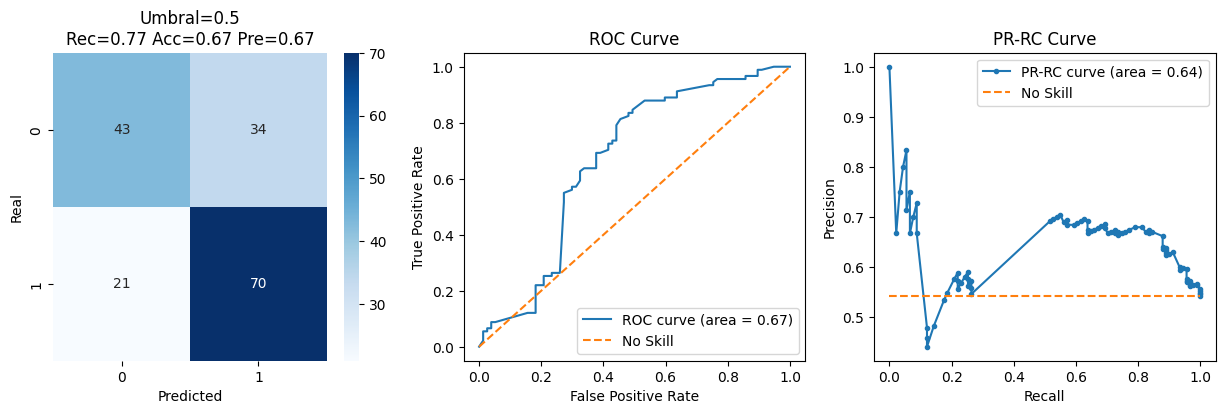

In [191]:
umbral=0.5

y_pred=y_pred_probs[:]>=umbral

fig, axes = plt.subplots(1,3)
fig.set_size_inches(15, 4)

matriz = confusion_matrix(y_test, y_pred)    
ax=axes[0]
sns.heatmap(matriz, annot=True, ax = ax, cmap="Blues",fmt="d");
ax.set_title("Umbral="+str(umbral)+"\nRec="+str(round(recall_score(y_test, y_pred),2))+
        " Acc="+str(round(accuracy_score(y_test, y_pred),2))+
        " Pre="+str(round(precision_score(y_test, y_pred),2)))
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Real')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs) 
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], '--', label='No Skill')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()

lr_precision, lr_recall, thresholds_pr = precision_recall_curve(y_test, y_pred_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
no_skill = len(y_test[y_test==1]) / len(y_test)
axes[2].plot(lr_recall, lr_precision, marker='.', label='PR-RC curve (area = %0.2f)' % auc(lr_recall,lr_precision))
axes[2].plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('PR-RC Curve')
axes[2].legend();

In [194]:
puntos=np.where(lr_precision[:-1]>0.67)
recs=[]
thrs=[]
print(puntos)
for punto in puntos:
    rec=lr_recall[punto]
    thr=thresholds_pr[punto]
    recs.append(rec)
    thrs.append(thr)
print("recalls",recs)
print("thresholds",thrs)
print("precisions",lr_precision[puntos])

(array([30, 32, 33, 34, 40, 41, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 82, 83, 85, 86, 87, 88, 89]),)
recalls [array([0.83516484, 0.81318681, 0.79120879, 0.76923077, 0.72527473,
       0.71428571, 0.69230769, 0.69230769, 0.68131868, 0.67032967,
       0.65934066, 0.64835165, 0.63736264, 0.63736264, 0.62637363,
       0.61538462, 0.6043956 , 0.59340659, 0.57142857, 0.57142857,
       0.56043956, 0.54945055, 0.53846154, 0.52747253, 0.51648352,
       0.08791209, 0.07692308, 0.06593407, 0.05494505, 0.05494505,
       0.04395604, 0.03296703])]
thresholds [array([0.49251726, 0.4954656 , 0.4981967 , 0.5024676 , 0.53442144,
       0.5358748 , 0.5385294 , 0.54439634, 0.5450349 , 0.5464234 ,
       0.5464235 , 0.5548901 , 0.57886225, 0.58104163, 0.5819198 ,
       0.5838304 , 0.58430946, 0.58865803, 0.59007263, 0.5930618 ,
       0.593513  , 0.5968512 , 0.6013291 , 0.6015644 , 0.60242   ,
       0.7498467 , 0.7517224 , 0.76410574, 0.77115595, 0.791872

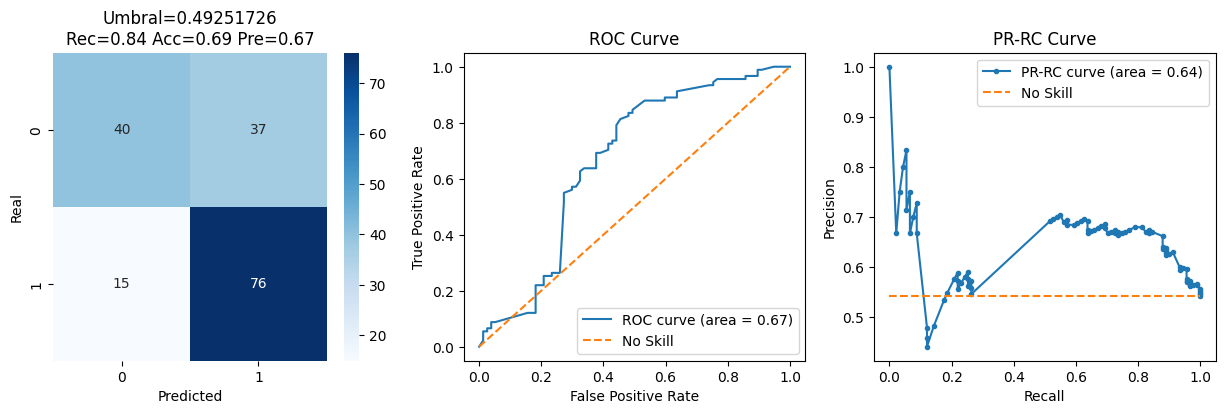

In [195]:
umbral=0.49251726

y_pred=y_pred_probs[:]>=umbral

fig, axes = plt.subplots(1,3)
fig.set_size_inches(15, 4)

matriz = confusion_matrix(y_test, y_pred)    
ax=axes[0]
sns.heatmap(matriz, annot=True, ax = ax, cmap="Blues",fmt="d");
ax.set_title("Umbral="+str(umbral)+"\nRec="+str(round(recall_score(y_test, y_pred),2))+
        " Acc="+str(round(accuracy_score(y_test, y_pred),2))+
        " Pre="+str(round(precision_score(y_test, y_pred),2)))
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Real')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs) 
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], '--', label='No Skill')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()

lr_precision, lr_recall, thresholds_pr = precision_recall_curve(y_test, y_pred_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
no_skill = len(y_test[y_test==1]) / len(y_test)
axes[2].plot(lr_recall, lr_precision, marker='.', label='PR-RC curve (area = %0.2f)' % auc(lr_recall,lr_precision))
axes[2].plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('PR-RC Curve')
axes[2].legend();